<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/reg_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão logística

In [0]:
import pandas as pd
import numpy as np
import math

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/banknotes.txt',names=['f1','f2','f3','f4','fraude'])

In [3]:
df.head()

,f1,f2,f3,f4,fraude
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
f1        1372 non-null float64
f2        1372 non-null float64
f3        1372 non-null float64
f4        1372 non-null float64
fraude    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


A amostra é balanceada em positivos e negativos? Dica: use .value_counts() na série do target

In [41]:
df['fraude'].value_counts()

0    762
1    610
Name: fraude, dtype: int64

In [0]:
#Função sigmoide
def sig(x):
  return 1 / (1 + math.exp(-x))

In [0]:
#função sigmoide para um vetor inteiro v
def sig_vet(v):
  for i in range(len(v)):
    v[i] = sig(v[i])
  return v

In [0]:
def grad(X,theta,y):
  return (1/len(y))*(np.dot(X.T, sig_vet(np.dot(X, theta)) - y))

In [0]:
def custo(X,theta,y):
  parte_a = np.dot(y.T, np.log(sig_vet(np.dot(X, theta))))
  parte_b = np.dot((1 - y).T, np.log(1 - sig_vet(np.dot(X, theta))))
  return (1 / len(y)) * (parte_a - parte_b)

In [93]:
#montagem de X e y
X = np.ones((len(df), 5))
X[:, 1] = df['f1']
X[:, 2] = df['f2']
X[:, 3] = df['f3']
X[:, 4] = df['f4']

y = df['fraude']

X[:2], y


(array([[ 1.     ,  3.6216 ,  8.6661 , -2.8073 , -0.44699],
        [ 1.     ,  4.5459 ,  8.1674 , -2.4586 , -1.4621 ]]), 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1367    1
 1368    1
 1369    1
 1370    1
 1371    1
 Name: fraude, Length: 1372, dtype: int64)

In [94]:
#aqui fazemos o gradient descent
theta = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
lc = [custo(X, theta, y)]
tol = 0.0001
for i in range(10000):
  g = grad(X, theta, y)
  theta = theta - 0.01 * g
  lc.append(custo(X, theta, y))
  if abs(lc[i + 1] - lc[i]) / lc[i] < tol and i > 3:
    print(i, 'iteracoes')
    break
lc[-1], theta


79 iteracoes


(-0.002838165010334485,
 array([ 0.39087558, -0.34309246, -0.05279826,  0.01806277,  0.32141707]))

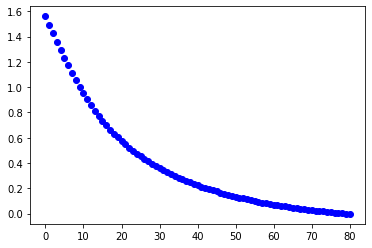

In [95]:
# Gráfico de custo
import matplotlib.pyplot as plt
plt.plot(lc, 'bo')
plt.show()


Calcule a acurácia na amostra de treinamento

In [96]:
ye = sig_vet(np.dot(X, theta))
for i in range(len(ye)):
  if ye[i] > 0.5: ye[i] = 1
  else: ye[i] = 0

certos = 0
for i in range((len(y))):
  if int(ye[i]) == int(y[i]): certos += 1

certos/len(y)

0.8360058309037901